In [1]:
# !pip install pydotplus
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension
# !pip install graphviz

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display
from ipywidgets import interactive

In [3]:
# Importacao dados
df = pd.read_csv('risco-credito.csv')
df.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


In [4]:
labels = ['historia', 'divida', 'garantias', 'renda']
labels

['historia', 'divida', 'garantias', 'renda']

In [5]:
# Dividir entre previsores e classes
previsores = df.iloc[:, 0:4].values
previsores

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa ', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [6]:
# Dividir entre previsores e classes
classes = df.iloc[:, 4].values
classes

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [7]:
labelencoder = LabelEncoder()
previsores[:, 0] = labelencoder.fit_transform(previsores[:, 0])
previsores[:, 1] = labelencoder.fit_transform(previsores[:, 1])
previsores[:, 2] = labelencoder.fit_transform(previsores[:, 2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores

array([[3, 0, 1, 0],
       [2, 0, 1, 1],
       [2, 1, 1, 1],
       [2, 1, 1, 2],
       [2, 1, 1, 2],
       [2, 1, 0, 2],
       [3, 1, 1, 0],
       [3, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [1, 0, 1, 2],
       [3, 0, 1, 1]], dtype=object)

In [8]:
classificador = DecisionTreeClassifier(criterion="entropy")
classificador.fit(previsores, classes)
classificador

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
res = classificador.predict([[0, 0, 1, 2],[3, 0, 0, 0]])
res

array(['baixo', 'alto'], dtype=object)

In [10]:
print(classificador.class_weight)
print(classificador.classes_)
print(classificador.decision_path)
print(classificador.feature_importances_)

None
['alto' 'baixo' 'moderado']
<bound method BaseDecisionTree.decision_path of DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>
[0.48015651 0.06408636 0.03885431 0.41690281]


In [11]:
export.export_graphviz(classificador,
                       out_file='decision.dot',
                      feature_names=['historia','divida','garantia','renda'],
                      class_names=['alto','moderado','baixo'],
                      filled=True,
                      leaves_parallel=True)

In [12]:
graph = Source(tree.export_graphviz(classificador
                                    , out_file=None
                                    , feature_names=labels
                                    , class_names=['alto', 'moderado', 'baixo']
                                    , filled=True))

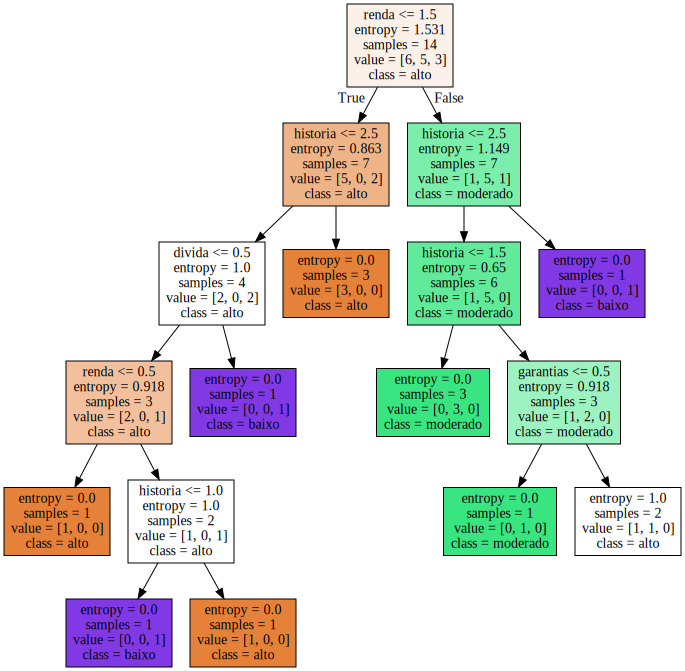

In [13]:
display(SVG(graph.pipe(format='svg')))

In [14]:
# previsores_treinamento, classes_treinamento, previsores_teste, classes_teste = train_test_split(previsores, classes, test_size = 0.15, random_state=0)